In [2]:
# Import Dependencies 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image
from sklearn import tree



In [3]:
# Import data
file_path = "/Users/samuelvincentneal/Desktop/Project-2/mushrooms.csv"
df = pd.read_csv(file_path)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Check the value counts

df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [5]:
# Check for nulls
null_values = df.isnull().sum()
print(null_values)


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [6]:
# Check all possible values
for column in df.columns:
    print(f"Column '{column}' unique values and counts:")
    print(df[column].value_counts())
    print("\n")

Column 'class' unique values and counts:
class
e    4208
p    3916
Name: count, dtype: int64


Column 'cap-shape' unique values and counts:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64


Column 'cap-surface' unique values and counts:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64


Column 'cap-color' unique values and counts:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64


Column 'bruises' unique values and counts:
bruises
f    4748
t    3376
Name: count, dtype: int64


Column 'odor' unique values and counts:
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64


Column 'gill-attachment' unique values and counts:
gill-attachment
f    7914
a     210
Name: count, dtype: int64


Column 'gill-spacing' unique values and counts:
gill-spacing
c    6812
w   

In [7]:
# Check data types

df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
# Seperate target variable 

y = df['class']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [9]:
# Features minus class

X = df.copy()
X = X.drop(columns='class')
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [10]:
# Split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
# Encode the class data

# Create instance of label encoder
le = LabelEncoder()

# Fit and transform the y training and testing data using the label encoder
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([1, 1, 0, ..., 0, 1, 0])

In [12]:
# Encode X train and test data with OneHotEncoder

# Create instance of OHE
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False, dtype='int')

X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train), columns = ohe.get_feature_names_out())
X_test_encoded = pd.DataFrame(data=ohe.transform(X_test), columns=ohe.get_feature_names_out())
X_train_encoded


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
6089,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6090,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
6091,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [14]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression(random_state=1)

# Fit the model to the training data
lr_model.fit(X_train_encoded, y_train_encoded)

LogisticRegression(random_state=1)

In [15]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % lr_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % lr_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [16]:
# Create the support vector machine classifier model with a 'poly' kernel
svm_model = SVC(kernel='poly')

# Fit the model to the training data
svm_model.fit(X_train_encoded, y_train_encoded)

SVC(kernel='poly')

In [17]:
# Validate the model by checking the model accuracy with model.score


print('Train Accuracy: %.3f' % svm_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % svm_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [18]:
# Create the KNN model with 9 neighbors
knn_model = KNeighborsClassifier(n_neighbors=9)

# Fit the model to the training data
knn_model.fit(X_train_encoded, y_train_encoded)

KNeighborsClassifier(n_neighbors=9)

In [19]:
# Validate the model by checking the model accuracy with model.score

# Convert to NumPy arrays and ensure they are C-contiguous
X_train_encoded = np.ascontiguousarray(X_train_encoded)
y_train_encoded = np.ascontiguousarray(y_train_encoded)
X_test_encoded = np.ascontiguousarray(X_test_encoded)
y_test_encoded = np.ascontiguousarray(y_test_encoded)

print('Train Accuracy: %.3f' % knn_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % knn_model.score(X_test_encoded, y_test_encoded))

/Users/samuelvincentneal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train Accuracy: 1.000
Test Accuracy: 1.000


/Users/samuelvincentneal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [20]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier()

In [21]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % dt_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % dt_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [22]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(n_estimators=128, random_state=1)

In [23]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % rf_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % rf_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


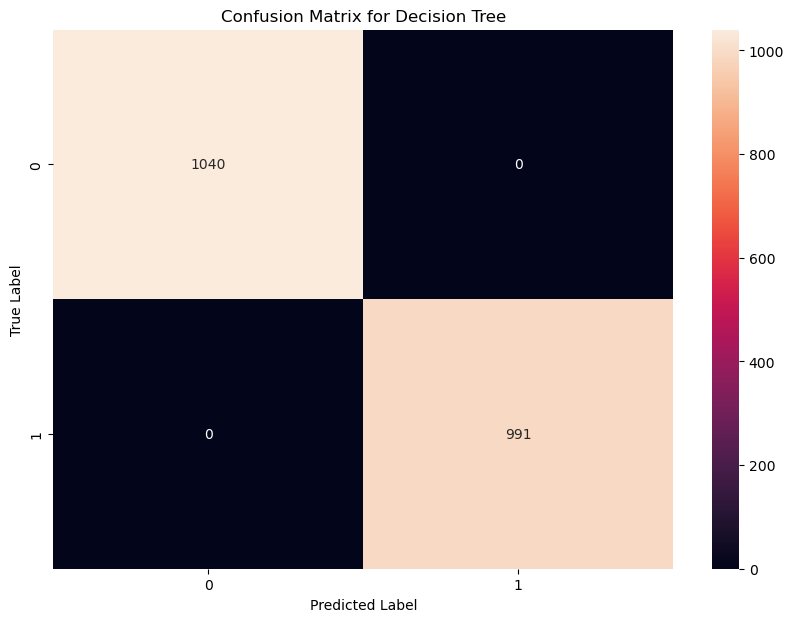

In [24]:
# Predicting the Test set results
predictions = dt_model.predict(X_test_encoded)

# Making the Confusion Matrix
cm_dt = confusion_matrix(y_test_encoded, predictions)

# Plotting the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_dt, annot=True, fmt="d")
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
# Classification report on decision tree
print(classification_report(y_test_encoded, predictions, labels = [1, 0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       991
           0       1.00      1.00      1.00      1040

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [26]:
# Predict values with probabilities
pred_probas = dt_model.predict_proba(X_test_encoded)

# Print the probabilities
pred_probas

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [27]:
# Each prediction includes a prediction for both the 0 class and the 1 class
# We only need the predictions for the 1 class; use a list comprehension to 
# gather the second value from each list

pred_probas_firsts = [prob[1] for prob in pred_probas]

# Print the first 5 probabilities
pred_probas_firsts[0:5]

[0.0, 1.0, 1.0, 0.0, 1.0]

In [28]:
# Calculate the roc_auc_score
print(roc_auc_score(y_test_encoded, pred_probas_firsts))

1.0


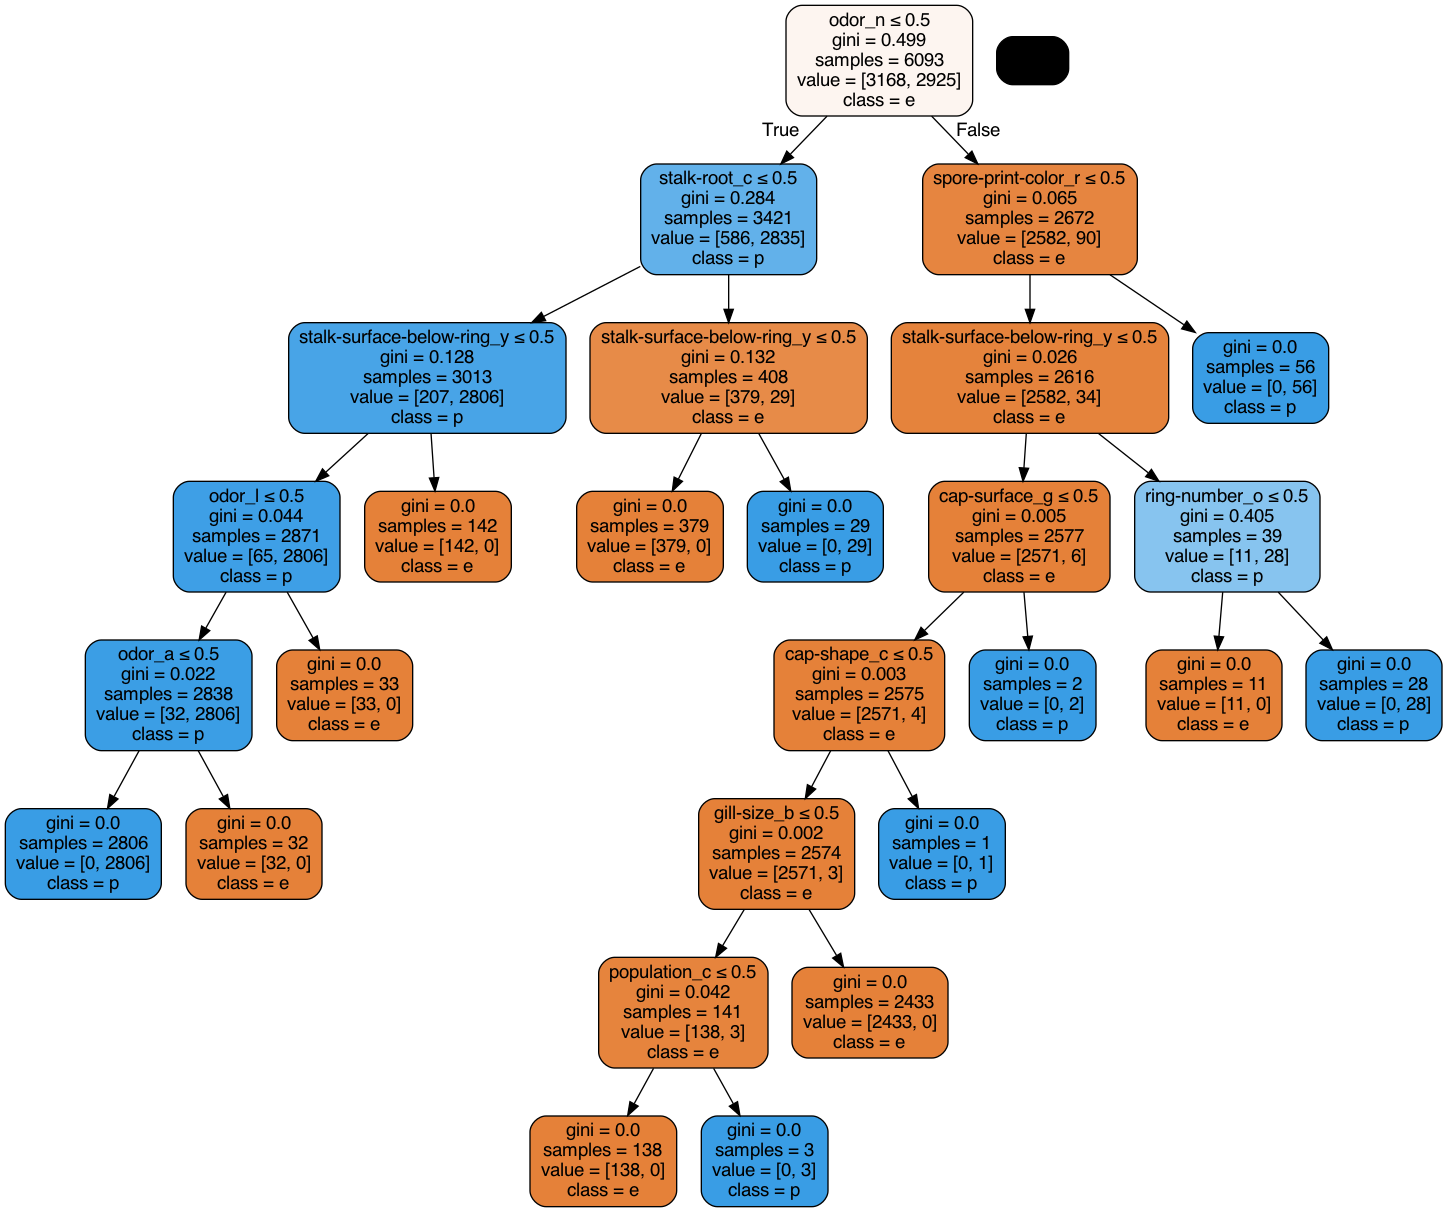

In [29]:
# Create a decision tree graph

# For sklearn versions that support it, you can get the output feature names
feature_names = ohe.get_feature_names_out(input_features=X.columns)
class_names = le.classes_.tolist()

dot_data = tree.export_graphviz(
    dt_model, out_file=None, 
    feature_names=feature_names,  
    class_names=class_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Mushrooms.png')

# Show graph
Image(graph.create_png())

In [30]:
# Test on fictitious data

dff= pd.read_csv("/Users/samuelvincentneal/Desktop/Project-2/fictitious_mushrooms.csv")

y2 = dff['class']

X2 = dff.copy()
X2 = X2.drop(columns='class')

X_fictitious = pd.DataFrame(data=ohe.transform(X2), columns = ohe.get_feature_names_out())
y_fictitious = le.transform(y2)

predictions_fictitious = dt_model.predict(X_fictitious)

accuracy_fict = accuracy_score(y_fictitious, predictions_fictitious)
report_fict = classification_report(y_fictitious, predictions_fictitious)

print(f"Accuracy: {accuracy_fict}")
print(f"Classification Report:\n{report_fict}")


Accuracy: 0.502
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       246
           1       0.51      0.51      0.51       254

    accuracy                           0.50       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.50      0.50      0.50       500



/Users/samuelvincentneal/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Since the machine learning models are perfect due to nature of dataset, adding noise

# Creating function to add noise to our categorical variables
def add_noise_categorical(column, noise_level=0.1):
    # Calculate the number of values to modify
    num_values = len(column)
    num_modifications = int(noise_level * num_values)
    
    # Randomly select indices to modify
    indices_to_modify = np.random.choice(num_values, num_modifications, replace=False)
    
    # For each selected index, randomly select a new value from the column (excluding the current value)
    for index in indices_to_modify:
        possible_values = column.drop(index)
        new_value = np.random.choice(possible_values)
        column.iloc[index] = new_value

# Apply the noise function to each categorical column in the dataframe
for column_name in df.columns:
    add_noise_categorical(df[column_name], noise_level=0.1)

# Display the first few rows of the modified dataframe
df.head()